In [ ]:
import sys

sys.path.append("..")

In [ ]:
# notebooks/01_eda.ipynb

import os

DATA_PATH = "../data/raw/student-mat.csv"

assert os.path.exists(DATA_PATH), "Dataset not found in data/raw/"
print("Dataset found. Ready for EDA.")


Dataset found. Ready for EDA.


In [3]:
import pandas as pd

df = pd.read_csv(DATA_PATH, sep=";")

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
# dataset size

df.shape

(395, 33)

In [5]:
# column names and data types

df.info()

<class 'pandas.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    str  
 1   sex         395 non-null    str  
 2   age         395 non-null    int64
 3   address     395 non-null    str  
 4   famsize     395 non-null    str  
 5   Pstatus     395 non-null    str  
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    str  
 9   Fjob        395 non-null    str  
 10  reason      395 non-null    str  
 11  guardian    395 non-null    str  
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    str  
 16  famsup      395 non-null    str  
 17  paid        395 non-null    str  
 18  activities  395 non-null    str  
 19  nursery     395 non-null    str  
 20  higher      395 non-null    str  
 21  inte

In [6]:
# numerical summary

df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
# target variable distribution

df["G3"].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [8]:
categorical_cols = df.select_dtypes(include="object").columns.tolist()
numerical_cols = df.select_dtypes(exclude="object").columns.tolist()

numerical_cols.remove("G3")  # target

categorical_cols, numerical_cols

C:\Users\KCS\AppData\Local\Temp\ipykernel_3968\1186893715.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = df.select_dtypes(include="object").columns.tolist()


(['school',
  'sex',
  'address',
  'famsize',
  'Pstatus',
  'Mjob',
  'Fjob',
  'reason',
  'guardian',
  'schoolsup',
  'famsup',
  'paid',
  'activities',
  'nursery',
  'higher',
  'internet',
  'romantic'],
 ['age',
  'Medu',
  'Fedu',
  'traveltime',
  'studytime',
  'failures',
  'famrel',
  'freetime',
  'goout',
  'Dalc',
  'Walc',
  'health',
  'absences',
  'G1',
  'G2'])

In [9]:
from src.preprocessing import build_preprocessor
preprocessing = build_preprocessor(
    categorical_cols, numerical_cols
)
print(preprocessing)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scalar', StandardScaler())]),
                                 ['age', 'Medu', 'Fedu', 'traveltime',
                                  'studytime', 'failures', 'famrel', 'freetime',
                                  'goout', 'Dalc', 'Walc', 'health', 'absences',
                                  'G1', 'G2']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['school', 'sex', 'address', 'famsize',
                                

In [10]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=["G3"])
y = df["G3"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42,
)

In [11]:
from src.train import build_baseline_model

baseline_model = build_baseline_model(
    categorical_cols,
    numerical_cols
)

baseline_model.fit(x_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('regression', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transforme

In [25]:
from src.evaluate import evaluate_regression

matrics = evaluate_regression(
    baseline_model,
    x_test,
    y_test
)

print(matrics)

{'mae': 1.6466656197147522, 'rmse': np.float64(2.378369784796138), 'r2': 0.7241341236974018}


In [13]:
from src.train import build_rf_model

rf_model = build_rf_model(categorical_cols, numerical_cols)

rf_model.fit(x_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('regressor', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformer

In [14]:
from src.evaluate import evaluate_regression

rf_matrics = evaluate_regression(
    rf_model,
    x_test,
    y_test
)

print(rf_matrics)

{'mae': 1.2005063291139242, 'rmse': np.float64(2.0149658413412745), 'r2': 0.8019957092176414}


In [15]:
results = {
    "LinearRegression": matrics,
    "RandomForest": rf_matrics
}

for res in results:
    print(results[res])

{'mae': 1.6466656197147522, 'rmse': np.float64(2.378369784796138), 'r2': 0.7241341236974018}
{'mae': 1.2005063291139242, 'rmse': np.float64(2.0149658413412745), 'r2': 0.8019957092176414}


In [16]:
rf = rf_model.named_steps["regressor"]
feature_names = rf_model.named_steps["preprocessor"].get_feature_names_out()
importance = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importance
}).sort_values(by="importance", ascending=False)

feature_importance_df.head(10)

,feature,importance
14,num__G2,0.787204
12,num__absences,0.114331
36,cat__reason_home,0.018982
0,num__age,0.009070
13,num__G1,0.005542
6,num__famrel,0.004970
11,num__health,0.004063
40,cat__guardian_mother,0.003701
8,num__goout,0.003611
4,num__studytime,0.003205


In [17]:
from src.predict import save_model

MODEL_PATH = "../models/student_performance_rf.pkl"

save_model(rf_model, MODEL_PATH)

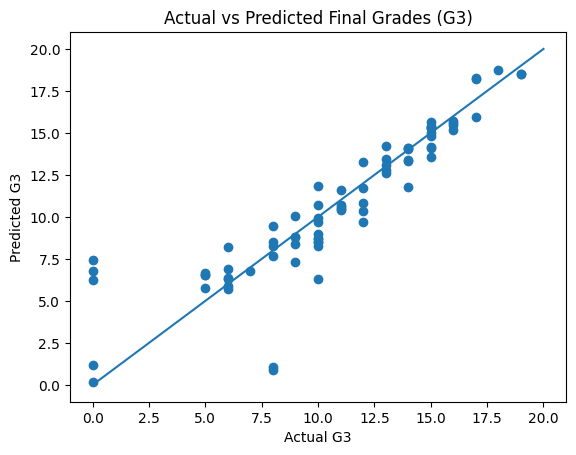

In [26]:
import matplotlib.pyplot as plt

y_pred = rf_model.predict(x_test)

plt.figure()
plt.scatter(y_test, y_pred)
plt.plot([0, 20], [0, 20])  # perfect prediction line
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Actual vs Predicted Final Grades (G3)")
plt.show()

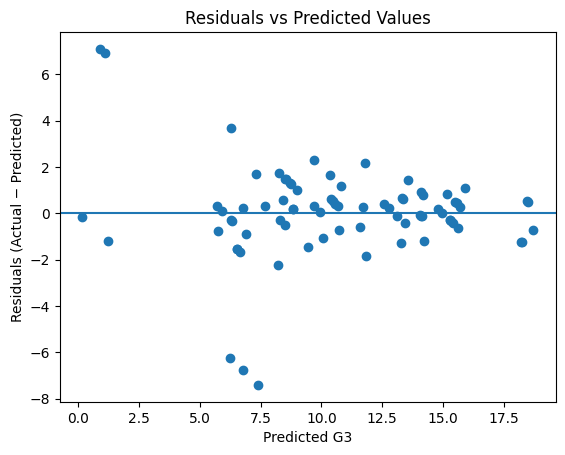

In [27]:
residuals = y_test - y_pred

plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted G3")
plt.ylabel("Residuals (Actual − Predicted)")
plt.title("Residuals vs Predicted Values")
plt.show()


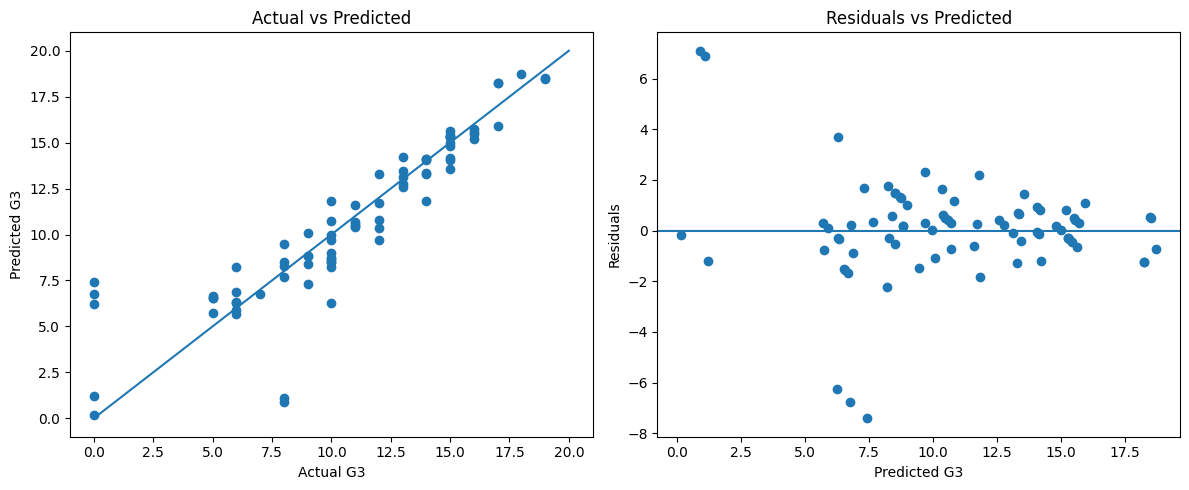

In [28]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ---- Plot 1: Actual vs Predicted ----
axes[0].scatter(y_test, y_pred)
axes[0].plot([0, 20], [0, 20])
axes[0].set_xlabel("Actual G3")
axes[0].set_ylabel("Predicted G3")
axes[0].set_title("Actual vs Predicted")

# ---- Plot 2: Residuals vs Predicted ----
axes[1].scatter(y_pred, residuals)
axes[1].axhline(0)
axes[1].set_xlabel("Predicted G3")
axes[1].set_ylabel("Residuals")
axes[1].set_title("Residuals vs Predicted")

plt.tight_layout()
plt.show()
